# Overview of CDCL Strategies in *Sat4j* for Optimization Problems

This document provides a complete analysis of the performance of the pseudo-Boolean solver *Sat4j* in which
we compare the impact of the use of different CDCL strategies for solving optimization problems.

By default, this document is **not** dynamic, so as to be readable on GitLab.
You may switch to a dynamic document by setting the variable `dynamic` to `True`, and re-run this Jupyter Notebook (the serialized results of the campaign are also available in this directory).
Note that the [*latest version of Metrics*](https://pypi.org/project/crillab-metrics/) must be installed in your environment to run this notebook.

In [1]:
dynamic = False
figsize = (10, 7)

## Loading the experiments

First, let us load the experiments with *Metrics*.
We note that an experiment will be considered as successfull when the solver has been able to prove the optimality with `OPTIMUM FOUND` or to prove the unsatisfiability with `UNSATISFIABLE`.
Otherwise, the solver did not have enough time to prove it, and either outputed `UNKNOWN` or nothing (if it did not have enough time to handle the `SIGTERM` signal).

In [2]:
from os import path
from metrics.wallet import Analysis, import_analysis

In [3]:
campaign_name = 'sat4j-optim'

if path.exists(f'{campaign_name}.json'):
    # Loading the serialized campaign.
    with open(f'{campaign_name}.json') as json_analysis:
        sat4j_optim = import_analysis(json_analysis.read())

else:
    # Extracting the campaign from the log files of the experiments, and serializing it for later use.
    sat4j_optim = Analysis(f'{campaign_name}.yml',
                           is_success=lambda xp: xp['decision'] in ('OPTIMUM FOUND', 'UNSATISFIABLE'))
    with open(f'{campaign_name}.json', 'w') as json_analysis:
        json_analysis.write(sat4j_optim.export())

We now keep the list of all the considered solvers to easily retrieve them later on.

In [4]:
all_solvers = sat4j_optim.campaign_df.xp_ware_names

In [5]:
solver_map = {
    'gr': 'Sat4j-GeneralizedResolution (default)',
    'gr-21': 'Sat4j-GeneralizedResolution (best)',
    'rs': 'Sat4j-RoundingSat (default)',
    'rs-21': 'Sat4j-RoundingSat (best)',
    'partial-rs': 'Sat4j-PartialRoundingSat (default)',
    'partial-rs-21': 'Sat4j-PartialRoundingSat (best)',
    'VBS': 'VBS'
}

## Virtual Best Solver

Let us create the VBS to show it on cactus plots.

In [6]:
sat4j_optim = sat4j_optim.add_vbew(xp_ware_set=all_solvers,
                                   opti_col='cpu_time',
                                   vbew_name='VBS')

## Overview of the Results

First, let us get an overview of the experimental results of the different strategies with a cactus plots of their runtime.

<AxesSubplot:title={'center':'Cactus Plot of the Runtime'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

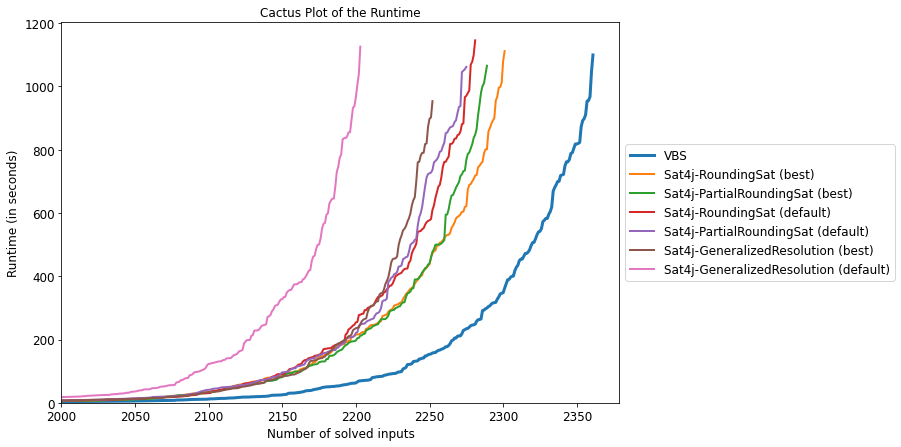

In [7]:
sat4j_optim.get_cactus_plot(cactus_col='cpu_time',
                            x_min=2000,
                            
                            title='Cactus Plot of the Runtime',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

Let us now consider the cactus plot of the number of conflicts encountered by the solver, so as to get insights about the size of the proofs built by the different configurations considered here.

<AxesSubplot:title={'center':'Cactus Plot of the Number of Conflicts'}, xlabel='Number of solved inputs', ylabel='Number of Conflicts'>

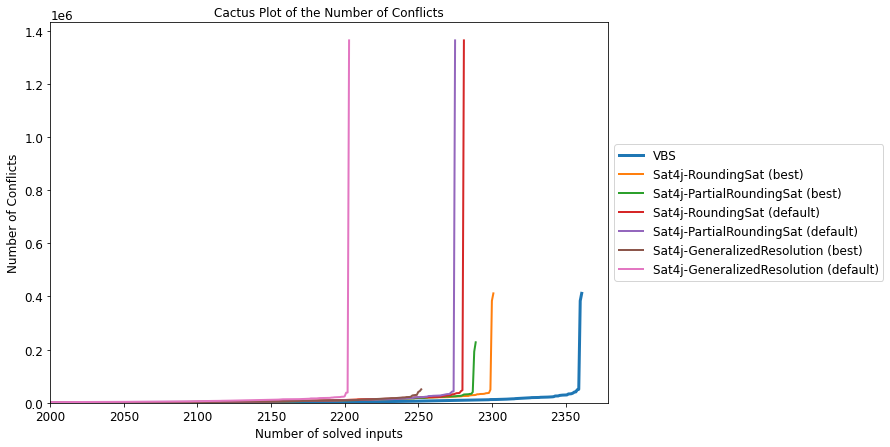

In [8]:
sat4j_optim.get_cactus_plot(cactus_col='conflicts',
                            x_min=2000,
                            
                            title='Cactus Plot of the Number of Conflicts',
                            y_axis_name="Number of Conflicts",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

A more precise view of the size of the proof may be obtained by looking at the number of cancellations performed
by the solver, instead of the number of conflicts.

<AxesSubplot:title={'center':'Cactus Plot of the Number of Cancellations'}, xlabel='Number of solved inputs', ylabel='Number of Cancellations'>

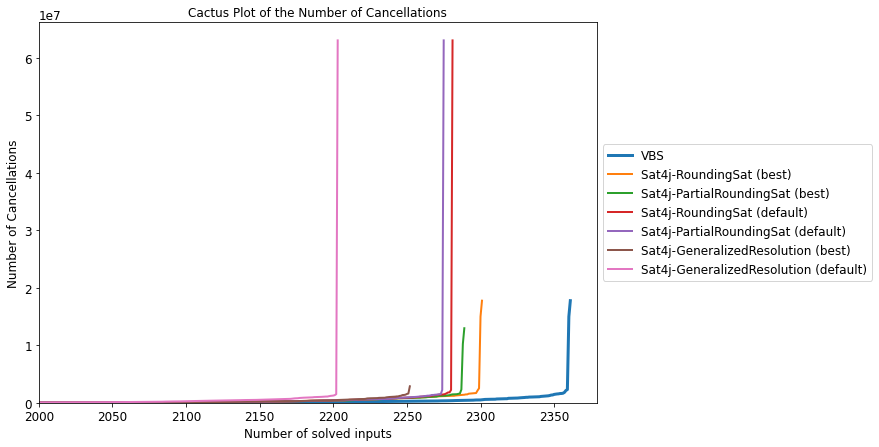

In [9]:
sat4j_optim.get_cactus_plot(cactus_col='steps',
                            x_min=2000,
                            
                            title='Cactus Plot of the Number of Cancellations',
                            y_axis_name="Number of Cancellations",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

## Pairwise Comparison of the Configurations

Let us now compare the performance of the different configuration of *Sat4j*, by comparing each default configuration of the different solvers to their best configurations.

### Performance of *Sat4j-GeneralizedResolution*

<AxesSubplot:title={'center':'Comparison of Sat4j-GeneralizedResolution (default) and Sat4j-GeneralizedResolution (best)'}, xlabel='Sat4j-GeneralizedResolution (default)', ylabel='Sat4j-GeneralizedResolution (best)'>

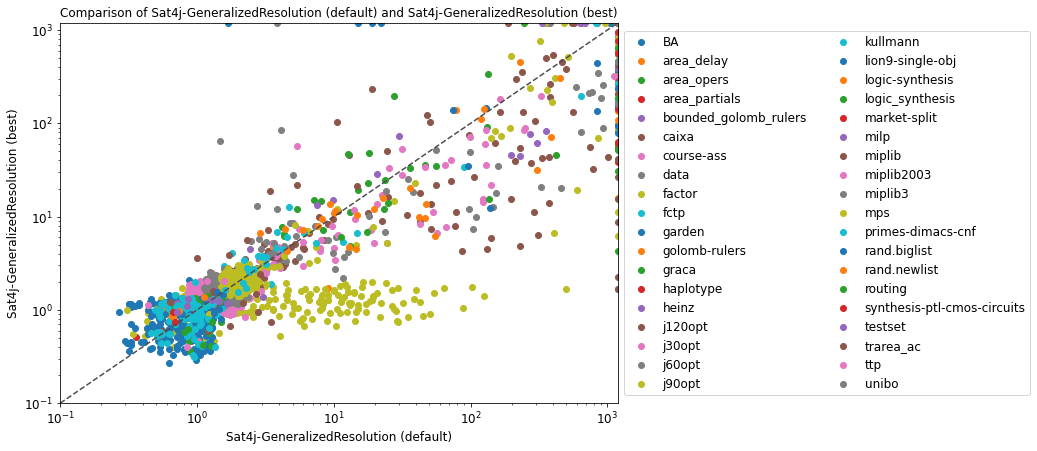

In [10]:
sat4j_optim.get_scatter_plot(xp_ware_x='gr',
                             xp_ware_y='gr-21',
                             
                             title='Scatter Plot of the Runtime',
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

### Performance of *Sat4j-RoundingSat*

<AxesSubplot:title={'center':'Comparison of Sat4j-RoundingSat (default) and Sat4j-RoundingSat (best)'}, xlabel='Sat4j-RoundingSat (default)', ylabel='Sat4j-RoundingSat (best)'>

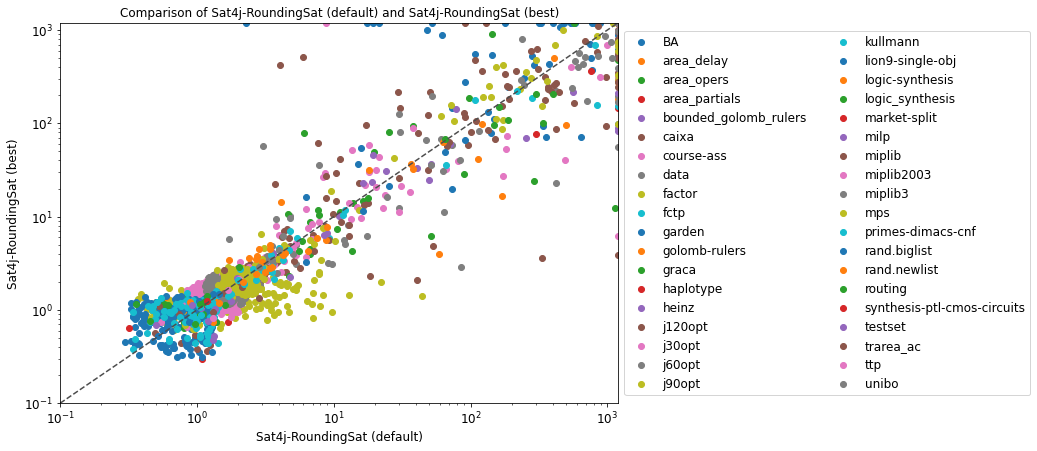

In [11]:
sat4j_optim.get_scatter_plot(xp_ware_x='rs',
                             xp_ware_y='rs-21',
                             
                             title='Scatter Plot of the Runtime',
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic) 

### Performance of *Sat4j-PartialRoundingSat*

<AxesSubplot:title={'center':'Comparison of Sat4j-PartialRoundingSat (default) and Sat4j-PartialRoundingSat (best)'}, xlabel='Sat4j-PartialRoundingSat (default)', ylabel='Sat4j-PartialRoundingSat (best)'>

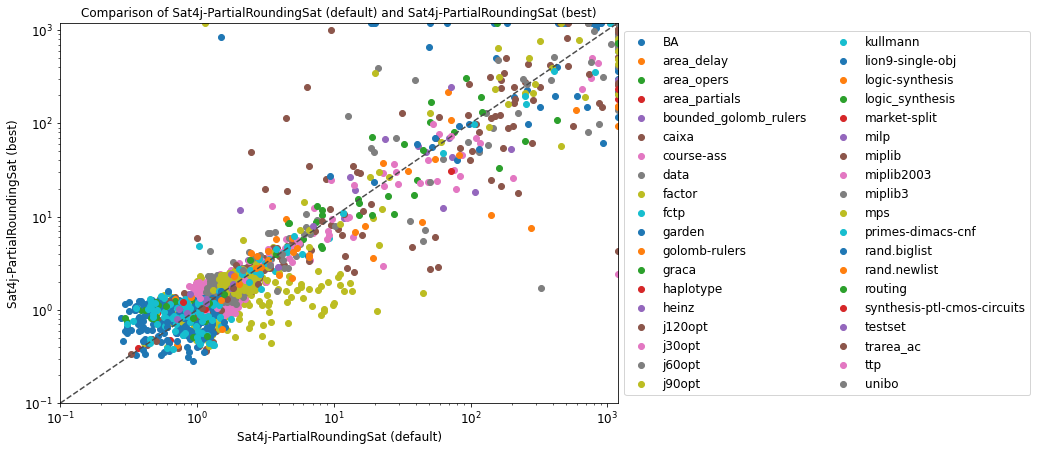

In [12]:
sat4j_optim.get_scatter_plot(xp_ware_x='partial-rs',
                             xp_ware_y='partial-rs-21',
                             
                             title='Scatter Plot of the Runtime',
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic) 

## Focus on the `factor` Family

On the scatter plots above, we can see that there is a significant improvement of *Sat4j* in its best configurations for the `factor` family.
Let us draw some cactus plot on this family.

<AxesSubplot:title={'center':'Cactus Plot of the Runtime on the factor Family'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

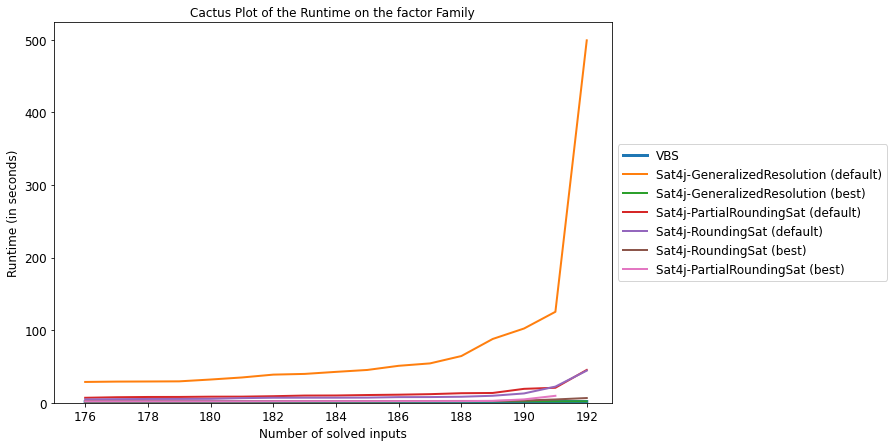

In [13]:
sat4j_optim.sub_analysis('family', ['factor'])\
           .get_cactus_plot(cactus_col='cpu_time',
                            x_min=175,
                            
                            title='Cactus Plot of the Runtime on the factor Family',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

<AxesSubplot:title={'center':'Cactus Plot of the Number of Conflicts on the factor Family'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

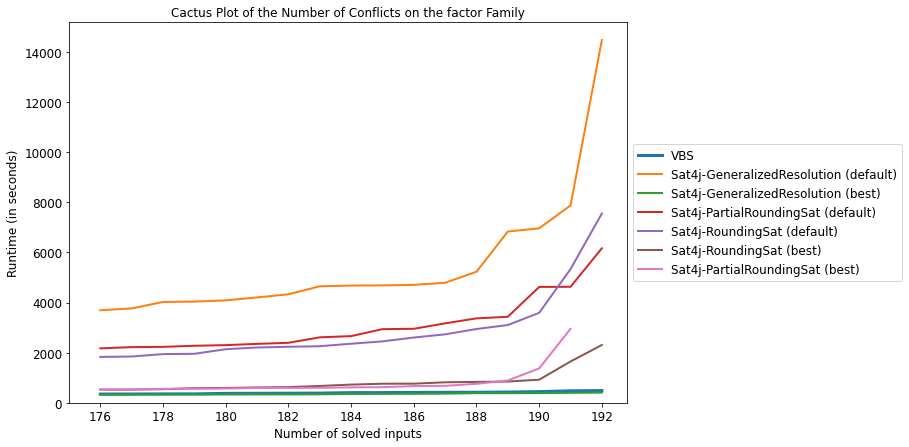

In [14]:
sat4j_optim.sub_analysis('family', ['factor'])\
           .get_cactus_plot(cactus_col='conflicts',
                            x_min=175,
                            
                            title='Cactus Plot of the Number of Conflicts on the factor Family',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

<AxesSubplot:title={'center':'Cactus Plot of the Number of Cancellation Steps on the factor Family'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

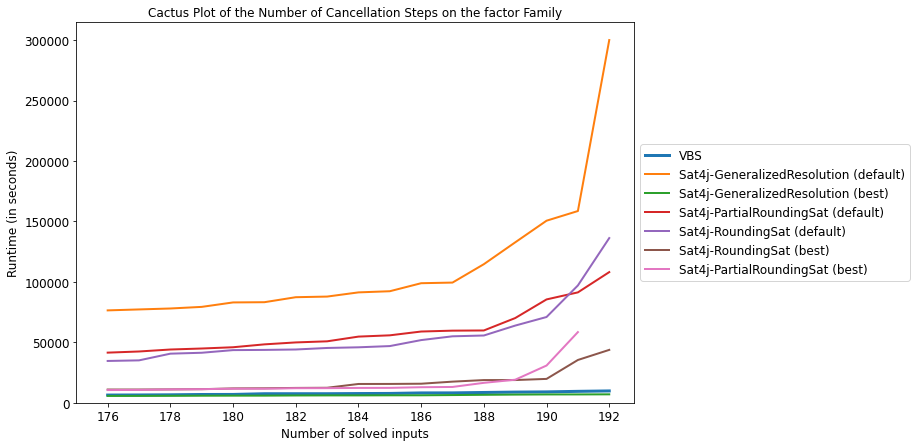

In [15]:
sat4j_optim.sub_analysis('family', ['factor'])\
           .get_cactus_plot(cactus_col='steps',
                            x_min=175,
                            
                            title='Cactus Plot of the Number of Cancellation Steps on the factor Family',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)